# Blood Donation in Malaysia

In [9]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from datetime import timedelta, datetime
import os


df_don_state = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv')
df_don_faci = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv')
df_newdon_state = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_state.csv')
df_newdon_faci = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv')
df_faci_master = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/data-resources-public/main/facilities_master.csv')
df_retention = pd.read_parquet('https://dub.sh/ds-data-granular')

### Blood Donor Generations since 2006

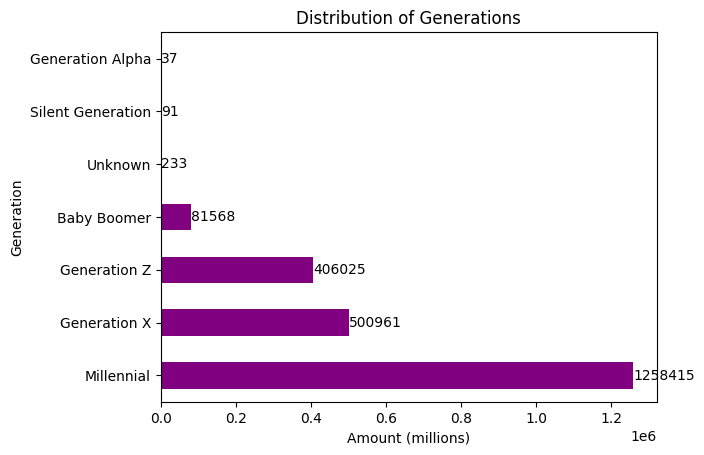

In [10]:
import matplotlib.pyplot as plt
import os
import pandas as pd

def determine_generation(year):
    if 1928 <= year <= 1945:
        return "Silent Generation"
    elif 1946 <= year <= 1964:
        return "Baby Boomer"
    elif 1965 <= year <= 1980:
        return "Generation X"
    elif 1981 <= year <= 1996:
        return "Millennial"
    elif 1997 <= year <= 2012:
        return "Generation Z"
    elif year >= 2013:
        return "Generation Alpha"
    else:
        return "Unknown"

df_donor_id = df_retention.drop(['visit_date'], axis=1)
df_donor_id = df_donor_id.groupby('donor_id')['birth_date'].max()
df_donor_id = df_donor_id.to_frame()
df_donor_id['generation'] = df_donor_id['birth_date'].apply(determine_generation)

generation_counts = df_donor_id['generation'].value_counts()

ax = generation_counts.plot(kind='barh', color='purple')
for i, v in enumerate(generation_counts.values):
    ax.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('Distribution of Generations')
plt.xlabel('Amount (millions)')
plt.ylabel('Generation')

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Blood_Donor_Generation.jpg'), format="jpg", bbox_inches='tight')

plt.show()


### Blood Donation Within a Year 2023

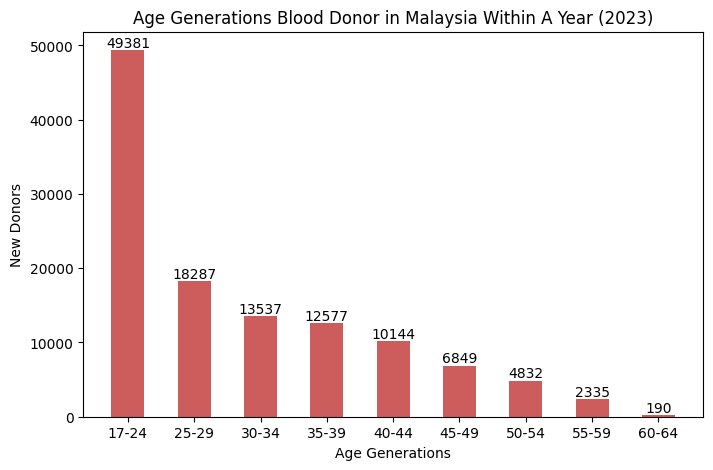

In [11]:
# Create, clean and modified data insight from blood donation MOH to get total number of donors according to their age
df_newdon_1year = df_newdon_state.copy()
df_newdon_1year = df_newdon_1year[df_newdon_1year['state'] != 'Malaysia']
df_newdon_1year['date'] = pd.to_datetime(df_newdon_1year['date'])
one_year_ago = datetime.now() - timedelta(days=365)
df_newdon_1year['within_past_year'] = df_newdon_1year['date'] >= one_year_ago
df_newdon_1year['within_past_year'] = df_newdon_1year['within_past_year'].astype(int)
df_newdon_1year = df_newdon_1year[df_newdon_1year['within_past_year'] == 1]
df_newdon_1year = df_newdon_1year.groupby('within_past_year')[['17-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-64', 'other', 'total']].sum()


donor_data = {'17-24':49381, '25-29':18287, '30-34':13537, '35-39':12577, '40-44':10144, '45-49':6849, '50-54':4832, '55-59':2335, '60-64':190}
age_ranges = list(donor_data.keys())
number_newdonors = list(donor_data.values())

age_ranges = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
number_newdonors = [49381, 18287, 13537, 12577, 10144, 6849, 4832, 2335, 190]

# Bar plotting
plt.figure(figsize=(8, 5))
color = ['indianred']
bars = plt.bar(age_ranges, number_newdonors, color=color, width=0.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Age Generations')
plt.ylabel('New Donors')
plt.title('Age Generations Blood Donor in Malaysia Within A Year (2023)')

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Age_Generations_Donors_2023.jpg'), format="jpg", bbox_inches='tight')

plt.show()

### Blood Donation Within a Month 2024

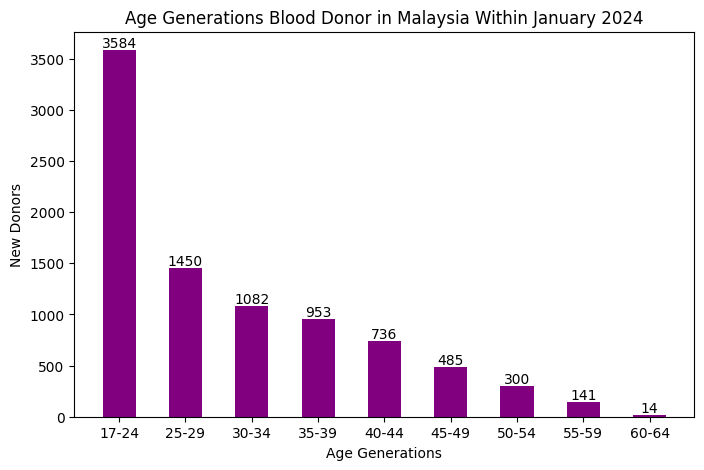

In [12]:
# Create and modified a data insight for total donors blood donation in a month (2024)
df_newdon_month = df_newdon_state.copy()
df_newdon_month = df_newdon_month[df_newdon_month['state'] != 'Malaysia']
df_newdon_month['date'] = pd.to_datetime(df_newdon_month['date'])
one_month_ago = datetime.now() - timedelta(days=30)
df_newdon_month['within_a_month'] = df_newdon_month['date'] >= one_month_ago
df_newdon_month['within_a_month'] = df_newdon_month['within_a_month'].astype(int)
df_newdon_month = df_newdon_month[df_newdon_month['within_a_month'] == 1]
df_newdon_month = df_newdon_month.groupby('within_a_month')[['17-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-64', 'other', 'total']].sum()

donor_data_2024 = {'17-24':3584, '25-29':1450, '30-34':1082, '35-39':953, '40-44':736, '45-49':485, '50-54':300, '55-59':141, '60-64':14}
age_ranges_2024 = list(donor_data_2024.keys())
number_newdonors_2024 = list(donor_data_2024.values())

age_ranges_2024 = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
number_newdonors_2024 = [3584, 1450, 1082, 953, 736, 485, 300, 141, 14]

# Bar plotting
plt.figure(figsize=(8, 5))
color = ['purple']
bars = plt.bar(age_ranges_2024, number_newdonors_2024, color=color, width=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Age Generations')
plt.ylabel('New Donors')
plt.title('Age Generations Blood Donor in Malaysia Within January 2024')

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Age_Generations_Donors_2024.jpg'), format="jpg", bbox_inches='tight')

plt.show()

### Highest Blood Donor - Social Group and Type of Blood

In [13]:
# Drop unrrelated columns
df_don_statefaci = df_don_state.merge(df_don_faci, on = ['date', 'daily'], suffixes = ('_for_don_state','_for_don_faci'))
df_don_statefaci.drop(df_don_statefaci.columns[[9,10,11,12,-7,-8,-9,-10]], axis = 1, inplace = True)

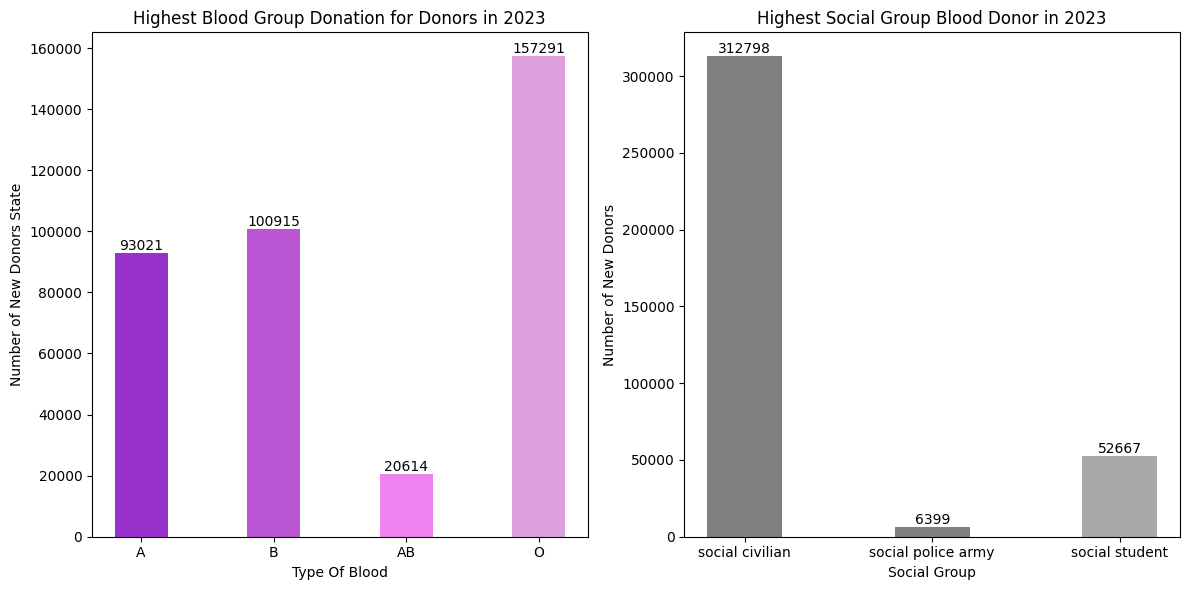

In [14]:
# Data insight for highest total blood donors in blood type and social groups
df_don_statefaci = df_don_statefaci.copy()
df_don_statefaci = df_don_statefaci[df_don_statefaci['state'] != 'Malaysia']
df_don_statefaci['date'] = pd.to_datetime(df_don_statefaci['date'])
one_year_ago = datetime.now() - timedelta(days=365)
df_don_statefaci['within_past_year'] = df_don_statefaci['date'] >= one_year_ago
df_don_statefaci['within_past_year'] = df_don_statefaci['within_past_year'].astype(int)
df_don_statefaci = df_don_statefaci[df_don_statefaci['within_past_year'] == 1]
df_don_statefaci = df_don_statefaci.groupby('within_past_year')[['blood_a_for_don_state','blood_b_for_don_state', 'blood_o_for_don_state','blood_ab_for_don_state', 'social_civilian_for_don_state','social_student_for_don_state', 'social_policearmy_for_don_state', 'blood_a_for_don_faci','blood_b_for_don_faci', 'blood_o_for_don_faci', 'blood_ab_for_don_faci', 'social_civilian_for_don_faci', 'social_student_for_don_faci','social_policearmy_for_don_faci']].sum()

# Total Donor don_state
df_blood_group_forstate = {'A':93021, 'B':100915, 'AB':20614, 'O':157291}
blood_type_S = list(df_blood_group_forstate.keys())
number_donors_S = list(df_blood_group_forstate.values())

# Total Social Group social_don_state
df_social_group_forstate = {'social_civilian_s':312798, 'social_student_s':52667, 'social_policearmy_s':6399}
social_group_S = list(df_social_group_forstate.keys())
number_donor_SGS = list(df_social_group_forstate.values())

blood_type_S = ['A', 'B', 'AB', 'O']
number_donors_S = [93021, 100915, 20614, 157291]

social_group_S = ['social civilian', 'social police army', 'social student']
number_donor_SGS = [312798, 6399, 52667]

# Bar graph for Blood Type and Social Group side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

color_blood_type = ['darkorchid', 'mediumorchid', 'violet', 'plum']
bars_blood_type = ax1.bar(blood_type_S, number_donors_S, color=color_blood_type, width=0.4, label='Blood Type')

for bar in bars_blood_type:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

ax1.set_xlabel('Type Of Blood')
ax1.set_ylabel('Number of New Donors State')
ax1.set_title('Highest Blood Group Donation for Donors in 2023')

color_social_group = ['gray', 'grey', 'darkgray']
bars_social_group = ax2.bar(social_group_S, number_donor_SGS, color=color_social_group, width=0.4, label='Social Group')

for bar in bars_social_group:
    yval_sgs = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval_sgs, int(yval_sgs), ha='center', va='bottom')

ax2.set_xlabel('Social Group')
ax2.set_ylabel('Number of New Donors')
ax2.set_title('Highest Social Group Blood Donor in 2023')

plt.tight_layout()

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Blood_Type_And_Social_Group.jpg'), format="jpg", bbox_inches='tight')

plt.show()

### Latest Blood Donation Trend

* Involves the daya insights of daily trend blood donation in Malaysia.

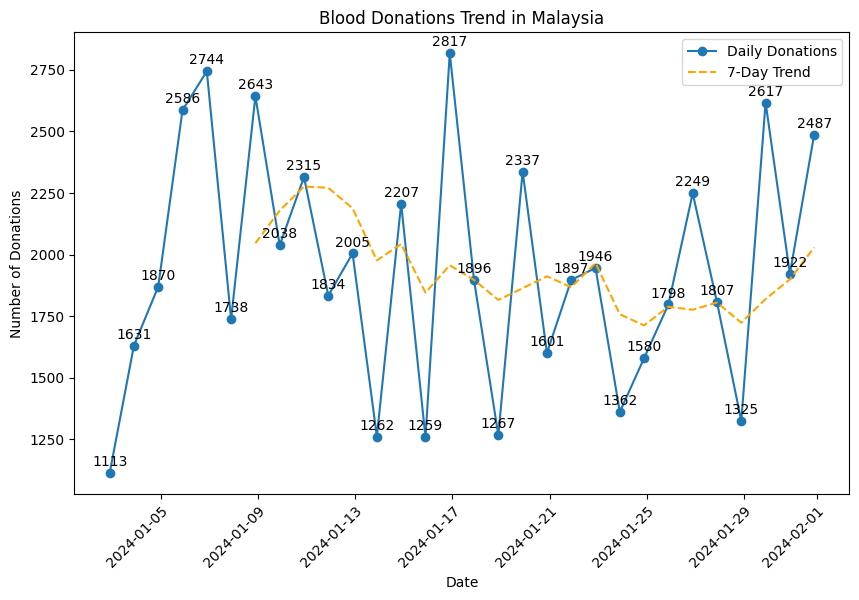

In [15]:
# Cleaned data to get latest trend
date_today = datetime.now()
date_range = pd.date_range(date_today - timedelta(29), date_today, freq='D')
donation_data = pd.DataFrame({
    'Date': date_range,
    'Donations': np.random.randint(1000, 3000, size=len(date_range))  # Replace with your actual donation data
})

# Create trend line
donation_data['Trend'] = donation_data['Donations'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))

plt.plot(donation_data['Date'], donation_data['Donations'], label='Daily Donations', marker='o')

plt.plot(donation_data['Date'], donation_data['Trend'], label='7-Day Trend', linestyle='--', color='orange')

for i, value in enumerate(donation_data['Donations']):
    plt.annotate(str(value), (donation_data['Date'][i], value), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Blood Donations Trend in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Donations')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.legend()
plt.grid(True, color='white')

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Daily_Trend.jpg'), format="jpg", bbox_inches='tight')

plt.show()


### Regular Voluntary Blood Donation - Donors

* Involves assessing whether individuals with a history of blood donation are returning regularly for subsequent donations. 
* Analyzing donor retention rates provides insights into the success of initiatives aimed at sustaining a consistent and reliable supply of blood contributions, crucial for meeting the ongoing demand for blood products in the country.

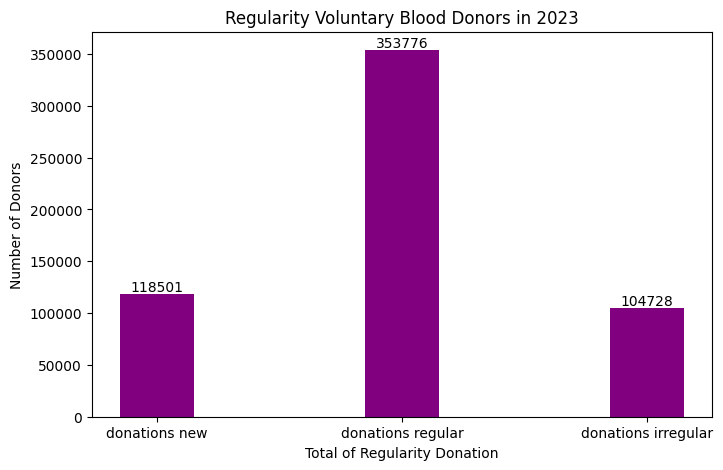

In [16]:
# To find total regularity voluntary donors
df_don_stateregular = df_don_state.copy()
df_don_stateregular = df_don_stateregular[df_don_stateregular['state'] != 'Malaysia']
df_don_stateregular['date'] = pd.to_datetime(df_don_stateregular['date'])
one_year_ago = datetime.now() - timedelta(days=365)
df_don_stateregular['within_past_year'] = df_don_stateregular['date'] >= one_year_ago
df_don_stateregular['within_past_year'] = df_don_stateregular['within_past_year'].astype(int)
df_don_stateregular = df_don_stateregular[df_don_stateregular['within_past_year'] == 1]
df_don_stateregular = df_don_stateregular.groupby('within_past_year')[['donations_new', 'donations_regular', 'donations_irregular']].sum()

# Save data about regularity voluntary blood donor
df_don_stateregular = {'donations_new':118501, 'donations_regular':353776, 'donations_irregular':104728}
regularity_donors = list(df_don_stateregular.keys())
number_donor_D = list(df_don_stateregular.values())

# Clean up data for regularity
regularity_donors = ['donations new', 'donations regular', 'donations irregular']
number_donor_D = [118501, 353776, 104728]

plt.figure(figsize=(8, 5))
color = ['purple', 'purple', 'purple']
bars = plt.bar(regularity_donors, number_donor_D, color=color, width=0.3)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Total of Regularity Donation')
plt.ylabel('Number of Donors')
plt.title('Regularity Voluntary Blood Donors in 2023')

save_dir = './Figures/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'Regularity_Voluntary_Donors.jpg'), format="jpg", bbox_inches='tight')

plt.show()